COVID-19: evaluating government measures

                    Efficiency of interventions on curbing the impact of COVID-19
This study investigates the effectiveness of the government measures aimed to decelerate the spread of COVID-19. The various government measures are weighted with the different time intervals of responds, calculated from the first case detected in the country. In case of lack of a measure, I used a large penalty number. COVID spread is represented by total deaths per million population (10th of July). A Random Forest model is definded to determine the main factors affecting the number of deaths in each country worldwide.

Importing libraries and reading data:

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [73]:
df=pd.read_csv('data1.csv', index_col='COUNTRY')

In [74]:
df.head()

,Additional health/documents requirements upon arrival,Amendments to funeral and burial regulations,Awareness campaigns,Border checks,Border closure,Changes in prison-related policies,Checkpoints within the country,Closure of businesses and public services,Complete border closure,Curfews,...,Partial lockdown,Psychological assistance and medical social work,Requirement to wear protective gear in public,Schools closure,State of emergency declared,Strengthening the public health system,Surveillance and monitoring,Testing policy,Visa restrictions,Deaths per Population*1000000
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,-31.0,-23.0,0.0,36.0,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,6.0,0.0,-22.0,-11.0,NaN,NaN,"24,7012930959163"
Albania,NaN,NaN,2.0,NaN,5.0,14.0,1.0,1.0,NaN,14.0,...,24.0,NaN,NaN,1.0,52.0,-45.0,35.0,NaN,NaN,"28,8352637905518"
Algeria,NaN,NaN,9.0,16.0,21.0,NaN,27.0,20.0,NaN,27.0,...,27.0,NaN,72.0,16.0,NaN,NaN,NaN,NaN,NaN,"22,6161387942366"
Angola,20.0,NaN,-9.0,7.0,7.0,13.0,NaN,7.0,NaN,NaN,...,37.0,NaN,27.0,3.0,7.0,6.0,43.0,50.0,-19.0,"0,673920852835811"
Argentina,NaN,NaN,-15.0,NaN,23.0,NaN,NaN,13.0,NaN,NaN,...,16.0,NaN,28.0,13.0,16.0,15.0,22.0,52.0,8.0,"37,8398025910578"


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Zimbabwe
Data columns (total 36 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Additional health/documents requirements upon arrival         51 non-null     float64
 1   Amendments to funeral and burial regulations                  29 non-null     float64
 2   Awareness campaigns                                           117 non-null    float64
 3   Border checks                                                 47 non-null     float64
 4   Border closure                                                145 non-null    float64
 5   Changes in prison-related policies                            61 non-null     float64
 6   Checkpoints within the country                                31 non-null     float64
 7   Closure of businesses and public services                    

Cleaning data:

In [76]:
df['Deaths per Population*1000000']=df['Deaths per Population*1000000'].apply(lambda x: x.replace(",","."))

In [77]:
df['Deaths per Population*1000000']=df['Deaths per Population*1000000'].astype(float)

In [78]:
df.fillna(value=100000, inplace=True)

Exploring data:

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Zimbabwe
Data columns (total 36 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Additional health/documents requirements upon arrival         173 non-null    float64
 1   Amendments to funeral and burial regulations                  173 non-null    float64
 2   Awareness campaigns                                           173 non-null    float64
 3   Border checks                                                 173 non-null    float64
 4   Border closure                                                173 non-null    float64
 5   Changes in prison-related policies                            173 non-null    float64
 6   Checkpoints within the country                                173 non-null    float64
 7   Closure of businesses and public services                    

In [80]:
df['Deaths per Population*1000000'].describe()

count    173.000000
mean      67.513771
std      138.910543
min        0.000000
25%        3.226934
50%       13.770424
75%       56.851234
max      844.684091
Name: Deaths per Population*1000000, dtype: float64

Text(0, 0.5, 'percent')

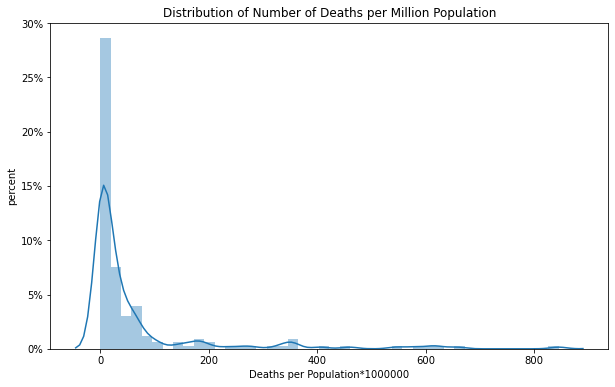

In [81]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10,6))
ax = sns.distplot(df['Deaths per Population*1000000'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(0.1, decimals=0))

plt.title("Distribution of Number of Deaths per Million Population")
plt.ylabel("percent")

Findigs from data exploration:
 - dataset is small  -> feature selection
                     -> outlier elimination 
                     -> cross validation
                     -> simple or ensemble models
                     -> regularization
 - target data is not normally distributed -> Random Forest model
                                           -> Histgradientboosting Regressor model


In [82]:
from sklearn.model_selection import train_test_split

In [89]:
X=df.drop('Deaths per Population*1000000', axis=1)
y=df['Deaths per Population*1000000']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=15)

Selecting the most important features:

In [90]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=100))

rfe.fit(X_train, y_train)

print('Selected features:')
rfe.support_

Selected features:


array([False,  True,  True,  True,  True,  True, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True])

In [91]:
X_train.columns

Index(['Additional health/documents requirements upon arrival',
       'Amendments to funeral and burial regulations', 'Awareness campaigns',
       'Border checks ', 'Border closure ',
       'Changes in prison-related policies', 'Checkpoints within the country',
       'Closure of businesses and public services', 'Complete border closure',
       'Curfews', 'Domestic travel restrictions', 'Economic measures',
       'Emergency administrative structures activated or established',
       'Full lockdown', 'General recommendations',
       'Health screenings in airports and border crossings',
       'Humanitarian exemptions', 'International flights suspension',
       'Isolation and quarantine policies', 'Limit product imports/exports',
       'Limit public gatherings',
       'Lockdown of refugee/idp camps or other minorities',
       'Mass population testing', 'Military deployment',
       'Obligatory medical tests not related to COVID-19',
       'Other public health measures enforced

In [92]:
res=rfe.support_
cols=X_train.columns
for i in range(0, len(res)):
    if res[i]==False:
        print (cols[i])

Additional health/documents requirements upon arrival
Checkpoints within the country
Closure of businesses and public services
Complete border closure
Curfews
Economic measures
Full lockdown
General recommendations
International flights suspension
Limit product imports/exports
Lockdown of refugee/idp camps or other minorities
Obligatory medical tests not related to COVID-19
Partial lockdown
Psychological assistance and medical social work
State of emergency declared
Strengthening the public health system
Surveillance and monitoring
Testing policy


In [93]:
for i in range(0, len(res)):
    if res[i]==False:
        X.drop(cols[i], inplace=True, axis=1)


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Amendments to funeral and burial regulations                  173 non-null    float64
 1   Awareness campaigns                                           173 non-null    float64
 2   Border checks                                                 173 non-null    float64
 3   Border closure                                                173 non-null    float64
 4   Changes in prison-related policies                            173 non-null    float64
 5   Domestic travel restrictions                                  173 non-null    float64
 6   Emergency administrative structures activated or established  173 non-null    float64
 7   Health screenings in airports and border crossings           

Random Forest model with Grid Search:

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [97]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt', 0.25, 0.5, 0.75, 1.0]
max_depth = [int(x) for x in np.linspace(1, 8, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [99]:
model=RandomForestRegressor()
grid=GridSearchCV(model, params, scoring='neg_mean_absolute_error',cv=5, n_jobs=-1, verbose=True)

In [100]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 2160 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 22.5min finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, None],
                         'max_features': ['auto', 'sqrt', 0.25, 0.5, 0.75, 1.0],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780,
                                          890, 1000]},
             scoring='neg_mean_absolute_error', verbose=True)

In [102]:
grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 10}

In [108]:
print('Mean absolute error score using Random Forest Regressor:', round(grid.best_score_*-1))

Mean absolute error score using Random Forest Regressor: 66


Calculating feature importances:

In [154]:
from sklearn.inspection import permutation_importance

rfr=RandomForestRegressor(
 bootstrap= True,
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 10)



In [172]:

from sklearn.model_selection import cross_val_score

In [179]:
scores=-1*cross_val_score(rfr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())

70.68922330297379


In [177]:
predictions=rfr.fit(X_train, y_train).predict(X_test)


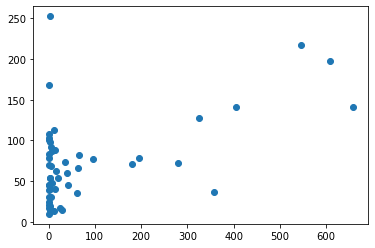

In [171]:
plt.scatter(y_test, predictions)

Text(0.5, 0, 'Relative Importance')

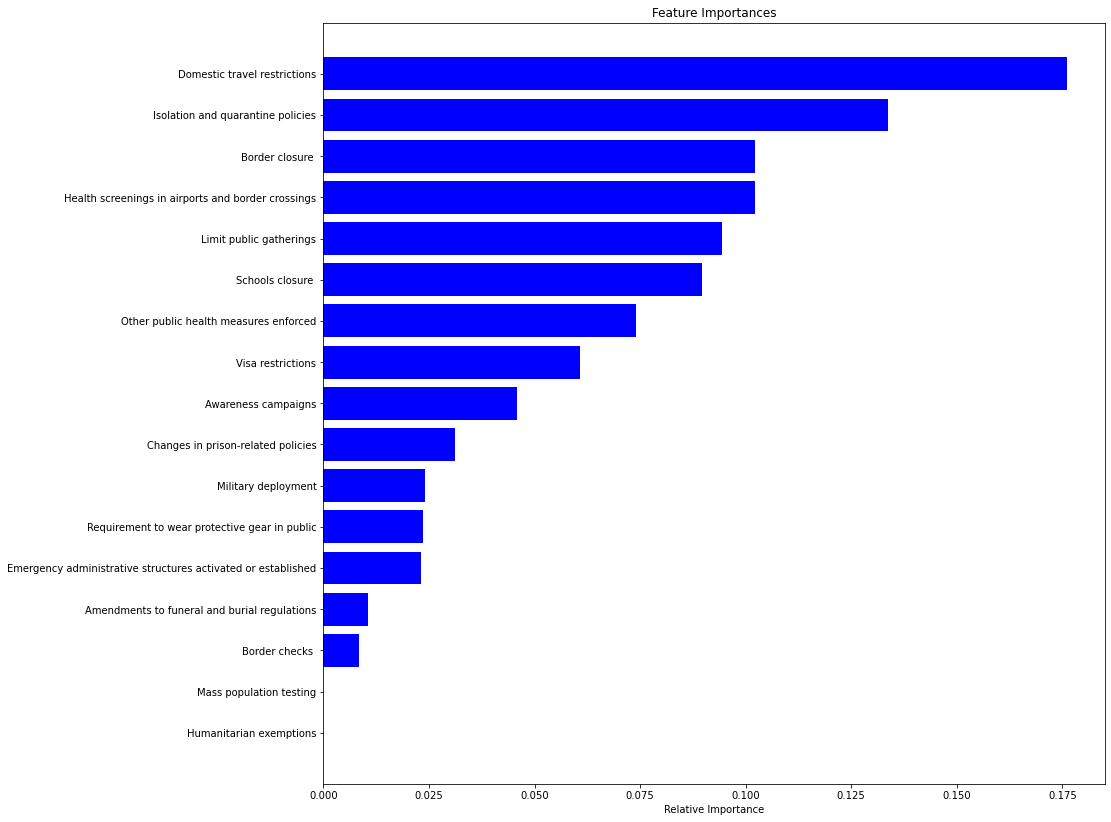

In [131]:
rfr.fit(X,y)
result=permutation_importance(rfr, X, y, n_repeats=10,random_state=101)
importances = rfr.feature_importances_
features=X.columns
indices = np.argsort(importances)
plt.figure(figsize=(14,14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


In [124]:
import eli5
from eli5.sklearn import PermutationImportance

/home/pitzm/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/pitzm/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [130]:
perm=PermutationImportance(rfr, random_state=101).fit(X,y)
eli5.show_weights(perm, feature_names=X.columns.tolist())

Weight,Feature
0.1566 ± 0.0551,Isolation and quarantine policies
0.1396 ± 0.0555,Border closure
0.1189 ± 0.0449,Health screenings in airports and border crossings
0.0930 ± 0.0355,Awareness campaigns
0.0911 ± 0.0190,Domestic travel restrictions
0.0868 ± 0.0243,Schools closure
0.0760 ± 0.0308,Limit public gatherings
0.0693 ± 0.0403,Other public health measures enforced
0.0407 ± 0.0159,Military deployment
0.0383 ± 0.0382,Visa restrictions


Histgradientboosting Regressor model

In [132]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [147]:
loss=['poisson']
max_iter = [500, 1000, 1500]
learning_rate = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
max_depth=[2, 5, 25, 50, None]
l2_regularization=[1.5, 1.5, 3]

params1 = {'loss': loss,
           'max_iter': max_iter,
           'learning_rate': learning_rate,
           'max_depth': max_depth,
           'l2_regularization': l2_regularization}

In [148]:
model1=HistGradientBoostingRegressor()
grid1=GridSearchCV(model1, params1, scoring='neg_mean_absolute_error',cv=5, n_jobs=-1, verbose=True)


In [149]:
grid1.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  6.8min finished


GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(), n_jobs=-1,
             param_grid={'l2_regularization': [1.5, 1.5, 3],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'loss': ['poisson'], 'max_depth': [2, 5, 25, 50, None],
                         'max_iter': [500, 1000, 1500]},
             scoring='neg_mean_absolute_error', verbose=True)

In [151]:
grid1.best_params_

{'l2_regularization': 3,
 'learning_rate': 0.1,
 'loss': 'poisson',
 'max_depth': 5,
 'max_iter': 500}

In [153]:
print('Mean absolute error score using Random Forest Regressor:', round(grid1.best_score_*-1))

Mean absolute error score using Random Forest Regressor: 55


In [156]:
hgbr=HistGradientBoostingRegressor(
 l2_regularization= 3,
 learning_rate=0.1,
 max_depth= 5,
 loss= 'poisson',
 max_iter= 500)


In [167]:
predictions1=hgbr.fit(X_train, y_train).predict(X_test)


In [168]:
scores=-1*cross_val_score(hgbr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())

55.23887390067515


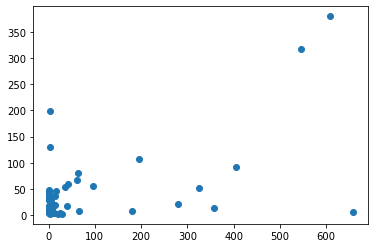

In [169]:
plt.scatter(y_test, predictions1)

In [190]:
perm1=PermutationImportance(hgbr, random_state=33).fit(X,y)
eli5.show_weights(perm1, feature_names=X.columns.tolist())

Weight,Feature
0.5059 ± 0.1354,Other public health measures enforced
0.3417 ± 0.1482,Border closure
0.3305 ± 0.3125,Isolation and quarantine policies
0.2433 ± 0.1328,Domestic travel restrictions
0.1775 ± 0.0706,Health screenings in airports and border crossings
0.1628 ± 0.0801,Requirement to wear protective gear in public
0.1491 ± 0.1324,Limit public gatherings
0.1431 ± 0.0551,Visa restrictions
0.1337 ± 0.0604,Awareness campaigns
0.0975 ± 0.0416,Emergency administrative structures activated or established
